In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn import metrics as mt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn import metrics as mt
from sklearn.svm import SVC

from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.decomposition import RandomizedPCA 
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.pipeline import Pipeline
from sklearn import metrics as mt




In [4]:
df = pd.read_csv('C:/NB15_train.csv')

In [5]:
# Load UNSW_NB15 into a Pandas dataframe

non_useful_features_list = ['id', 'attack_cat']

for feature in non_useful_features_list:
    if feature in df:
        df.drop(feature, axis=1, inplace=True)  # Lets drop id as it is an internal variable to just ref an obseratio
        

if "is_ftp_login" in df:
    df = df[df.is_ftp_login != 2]
    if len(df) == 82328:
        print ("duplicate record deleted successfully: " + str(len(df)) + " observations remaining" )
# Check to see if non useful features still exist in dataframe
for feature in non_useful_features_list:
    if feature in df:
        print ("[" + feature + "]" + "still found, check removal code. (Should not see this)")      

df_five = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'label' ]] 

df_five.info()
df_five.describe()

duplicate record deleted successfully: 82328 observations remaining
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sttl              82328 non-null  int64
 1   ct_dst_sport_ltm  82328 non-null  int64
 2   ct_src_dport_ltm  82328 non-null  int64
 3   swin              82328 non-null  int64
 4   dwin              82328 non-null  int64
 5   label             82328 non-null  int64
dtypes: int64(6)
memory usage: 4.4 MB


,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,swin,dwin,label
count,82328.000000,82328.000000,82328.000000,82328.000000,82328.000000,82328.000000
mean,180.973448,3.663092,4.929040,133.453175,128.280464,0.550578
std,101.512436,5.915518,8.389724,127.357276,127.491408,0.497438
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,254.000000,1.000000,1.000000,255.000000,255.000000,1.000000
75%,254.000000,3.000000,4.000000,255.000000,255.000000,1.000000
max,255.000000,38.000000,59.000000,255.000000,255.000000,1.000000


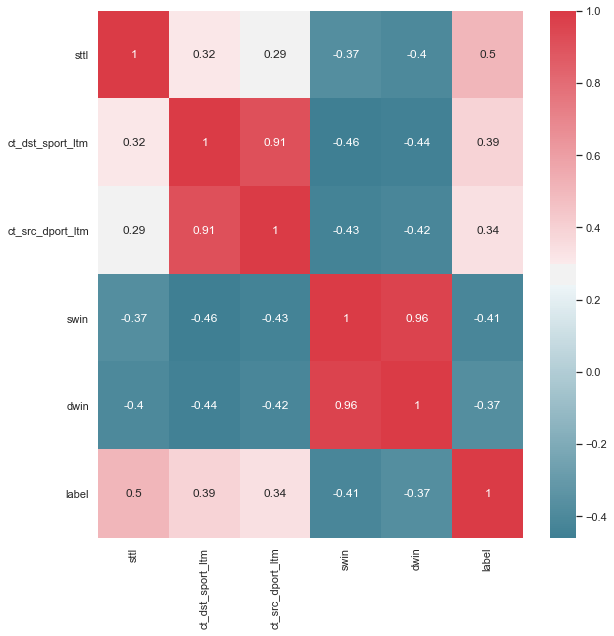

In [6]:
# plot the correlation matrix using seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_five.corr(), cmap=cmap, annot=True)

f.tight_layout()

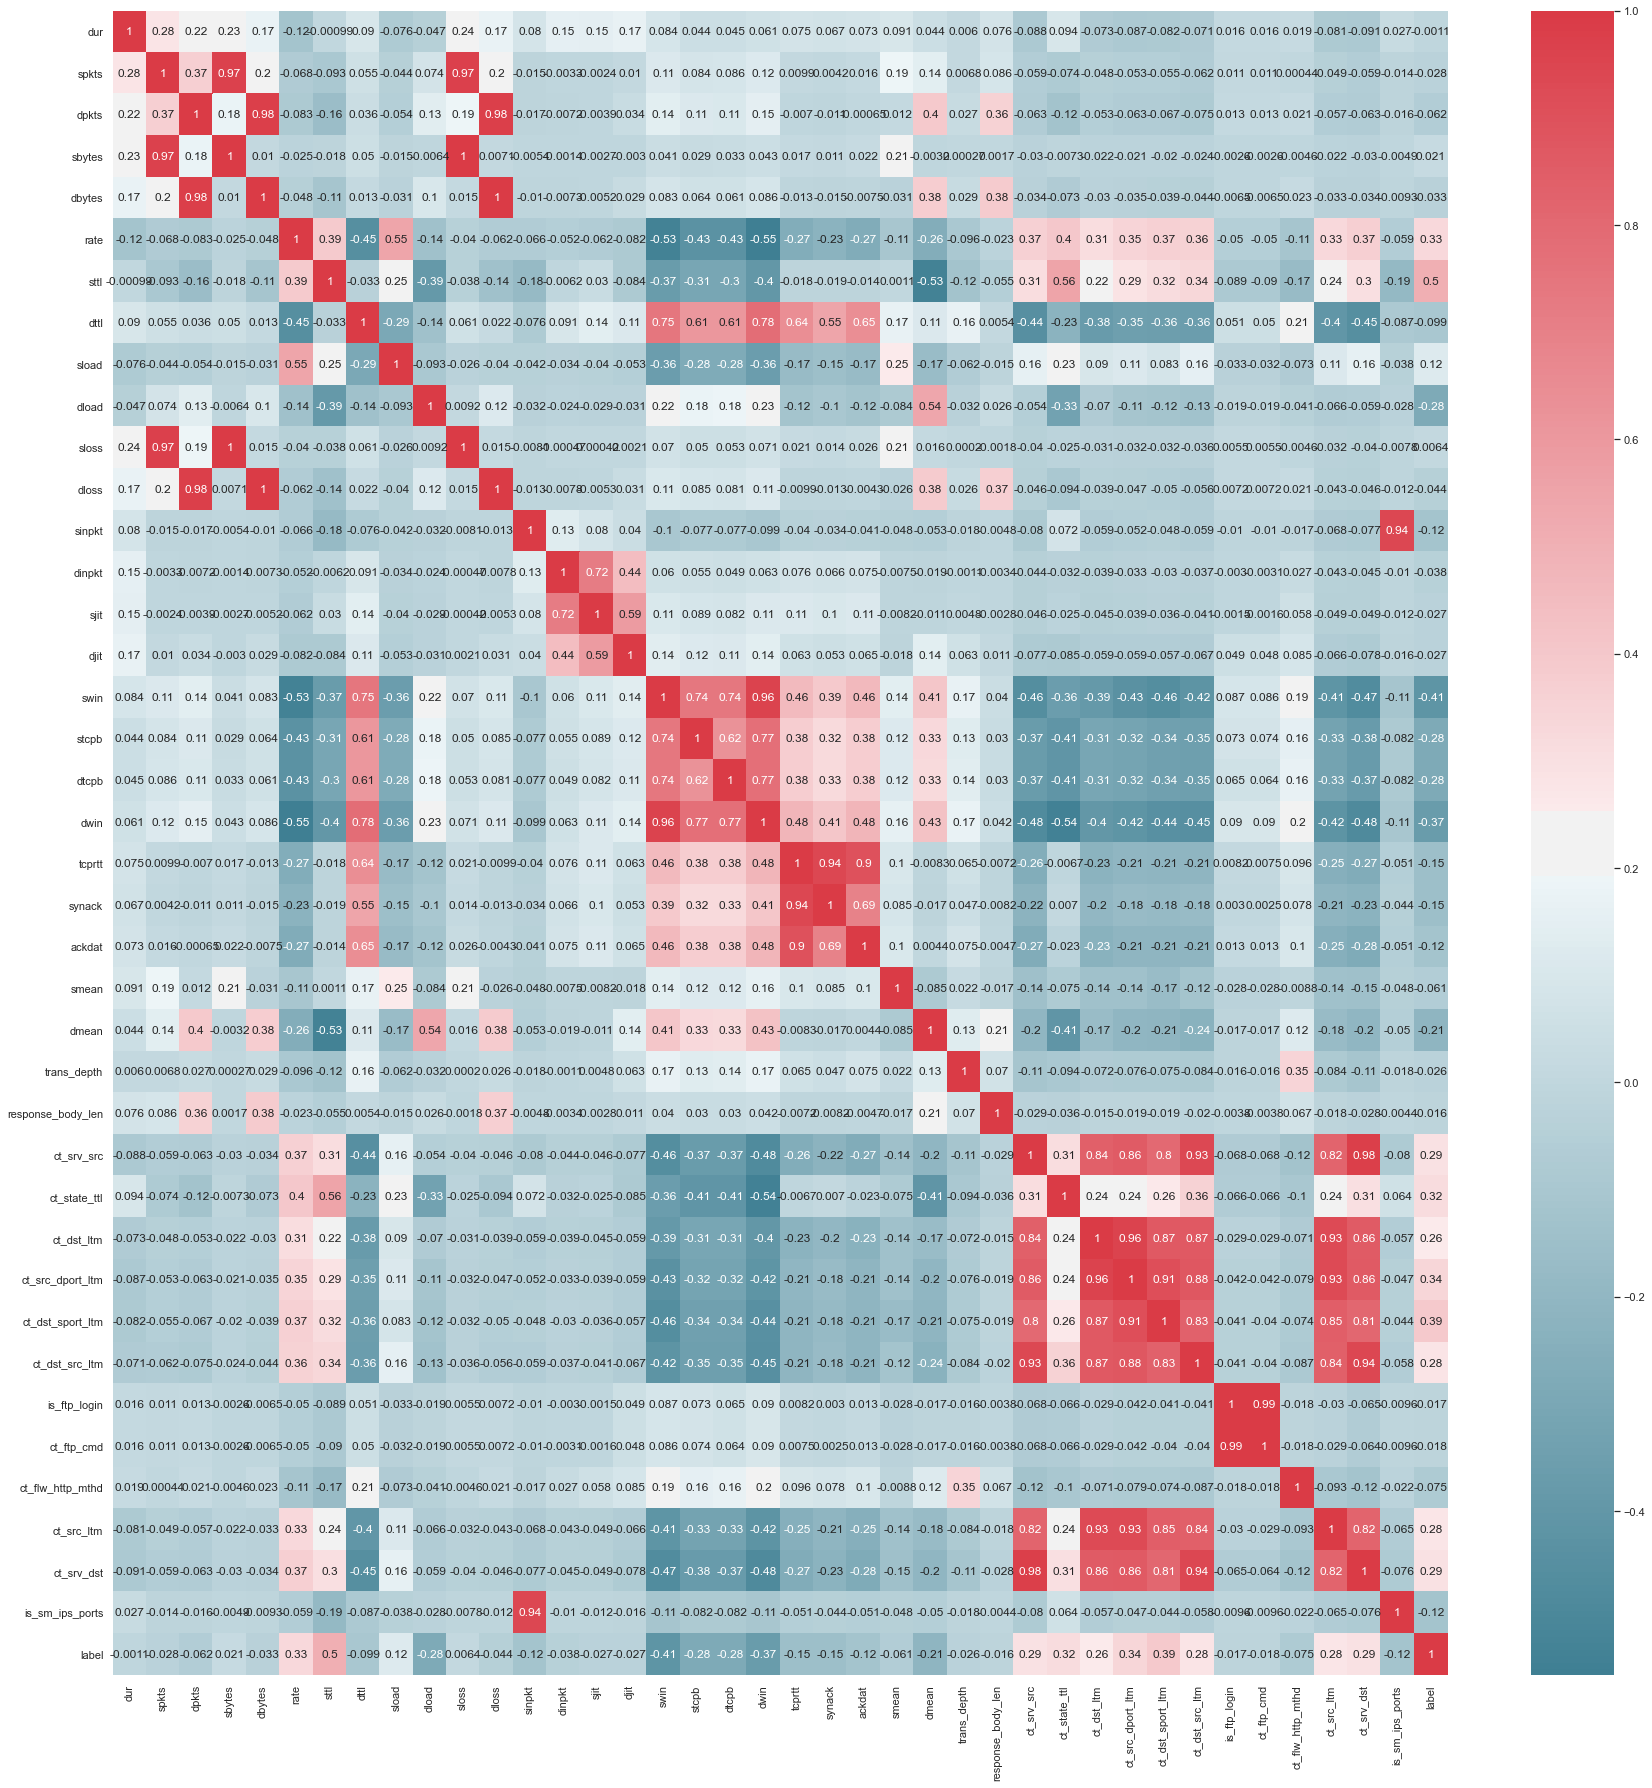

In [7]:
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [8]:
# based on feedback from mini lab, we want to check if accuracy increases from the selected 5 features to include the following
# two additional features: 'dttl', 'ct_dst_src_ltm',
df_seven = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'dttl', 'ct_dst_src_ltm', 'label' ]] # 
df_seven.info()
df_seven.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sttl              82328 non-null  int64
 1   ct_dst_sport_ltm  82328 non-null  int64
 2   ct_src_dport_ltm  82328 non-null  int64
 3   swin              82328 non-null  int64
 4   dwin              82328 non-null  int64
 5   dttl              82328 non-null  int64
 6   ct_dst_src_ltm    82328 non-null  int64
 7   label             82328 non-null  int64
dtypes: int64(8)
memory usage: 5.7 MB


,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,swin,dwin,dttl,ct_dst_src_ltm,label
count,82328.000000,82328.000000,82328.000000,82328.000000,82328.000000,82328.00000,82328.000000,82328.000000
mean,180.973448,3.663092,4.929040,133.453175,128.280464,95.70541,7.456528,0.550578
std,101.512436,5.915518,8.389724,127.357276,127.491408,116.66547,11.415443,0.497438
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,62.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,254.000000,1.000000,1.000000,255.000000,255.000000,29.00000,3.000000,1.000000
75%,254.000000,3.000000,4.000000,255.000000,255.000000,252.00000,6.000000,1.000000
max,255.000000,38.000000,59.000000,255.000000,255.000000,253.00000,63.000000,1.000000


# DATA PREP

In [9]:
# One-hot encode our object features:

# http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers
# Surrounding code in try/except on case where there are no object type features to one-hot encode
try:
    tmp_df = df.describe(include=['O'])  # creates a temporary df with just categorical features that are of object type
    categorical_object_col_name_list = tmp_df.columns.values.tolist()
    for col_name in categorical_object_col_name_list:
        #print col_name
        tmp_df = pd.get_dummies(df[col_name], prefix=col_name)
        df = pd.concat((df,tmp_df), axis=1)
        df.drop(col_name, axis=1, inplace=True)  # go ahead and drop original feature as it has now been one-hot encoded
except ValueError as e:
    print ("Value error({0}): ".format(e) ) # Note

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Columns: 191 entries, dur to state_RST
dtypes: float64(11), int64(29), uint8(151)
memory usage: 37.6 MB


In [11]:
# we want to predict the X and y data as follows for 5 feature iteration: 
df_five = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'label' ]] 

from sklearn.model_selection import RepeatedStratifiedKFold
if 'label' in df_five:
    y = df_five['label'].values # get the labels we want
    del df_five['label'] # get rid of the class label
    X = df_five.values # use everything else to predict!
    X_df_5 = X.copy() # used later for the Confidence Intervals
    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    # have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
                         
print (cv_object)
print(cv_object.get_n_splits(X,y))

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
30


In [12]:
X.shape

(82328, 5)

In [13]:
# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
from sklearn.model_selection import cross_val_score
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None , solver='lbfgs', max_iter=1000) # get object
for train_indices, test_indices in cv_object.split(X,y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)

accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)
print ("Average Accuracy (5 feature set) across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(np.average(accuracies)))

[0.77493016 0.76837119 0.76460585 0.7709219  0.7650917  0.77031459
 0.76594194 0.76642779 0.77089407 0.75862488 0.76351269 0.76545609
 0.76788534 0.7670351  0.77262237 0.76715657 0.77031459 0.77007166
 0.76773567 0.76433431 0.77116482 0.76326977 0.77067897 0.7650917
 0.76946435 0.76630633 0.76144783 0.76849265 0.77295918 0.76724976]
Average Accuracy (5 feature set) across 3 shuffle split cross validation iterations = 0.7676124612245923


In [14]:
X_test.shape

(8232, 5)

In [15]:
dfcopy = df.copy(deep=True) # preserve original dataframe that has our dependent variable
dfcopy.info()
# we want to predict the X and y data as follows:
if 'label' in dfcopy:
    y = dfcopy['label'].values # get the labels we want
    del dfcopy['label'] # get rid of the class label
    X = dfcopy.values # use everything else to predict!
dfcopy.info() # should have 190 entries
    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    # have converted them into simple matrices to use with scikit learn

# determine if we have roughly the same percentage of  normal vs abnormal observations
# ref: http://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
# ref: http://www.gossamer-threads.com/lists/python/python/809232 (print percentage)
unique, counts = np.unique(y, return_counts=True)
uniqueClassCounts = dict(zip(unique, counts))    
totalObservations = len(y)
print (uniqueClassCounts)
print ("Percent normal(0) is {0:.0%}".format(float(uniqueClassCounts[0])/totalObservations))
print ("Percent attack(1) is {0:.0%}".format(float(uniqueClassCounts[1])/totalObservations))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Columns: 191 entries, dur to state_RST
dtypes: float64(11), int64(29), uint8(151)
memory usage: 37.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Columns: 190 entries, dur to state_RST
dtypes: float64(11), int64(28), uint8(151)
memory usage: 37.0 MB
{0: 37000, 1: 45328}
Percent normal(0) is 45%
Percent attack(1) is 55%


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#ref : http://stackoverflow.com/questions/2866380/how-can-i-time-a-code-segment-for-testing-performance-with-pythons-timeit
import time
#ref: http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html
numObservations = len(dfcopy)
print (numObservations)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

num_folds = 10
kf = KFold(n_splits=num_folds)
skf = StratifiedKFold(num_folds)

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
print(kf)
t0 = time.process_time()

for train_index, test_index in kf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0

accuracies = cross_val_score(lr_clf, X, y=y, cv=kf) # this also can help with parallelism
#print(accuracies)
print ("Average Accuracy across " + str(num_folds) + " fold cross validation iterations = " + str(np.average(accuracies)) + " training time = " + str(total))

t0 = time.process_time()
for train_index, test_index in skf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# http://scikit-learn.org/stable/modules/model_evaluation.html


accuracies = cross_val_score(lr_clf, X, y=y, cv=skf) # this also can help with parallelism
precision = cross_val_score(lr_clf, X, y=y, cv=skf, scoring='precision')
recall = cross_val_score(lr_clf, X, y=y, cv=skf, scoring='recall')
accuracy = cross_val_score(lr_clf, X, y=y, cv=skf, scoring='accuracy')
f1 = cross_val_score(lr_clf, X, y=y, cv=skf, scoring='f1')# just testing to see if it is same as default


#print(accuracies)
#print "Percent normal(0) is {0:.0%}".format(float(classCounts[0])/totalObservations)
print ("Average Accuracies across stratified " + str(num_folds) + " fold cross validation iterations = {0:.0%} ".format(np.average(accuracies)) + " training time = " + str(total)) 
print ("Average Precision across stratified " + str(num_folds) + " fold cross validation iterations = {0:.0%}".format(np.average(precision)) + " training time = " + str(total))
print ("Average Recall(Sensitivity) across stratified " + str(num_folds) + " fold cross validation iterations = {0:.0%}".format(np.average(recall)) + " training time = " + str(total))    
print ("Average Accuracy across stratified " + str(num_folds) + " fold cross validation iterations = {0:.0%}".format(np.average(accuracy)) + " training time = " + str(total))
print ("Average F measure(F1) across stratified " + str(num_folds) + " fold cross validation iterations = {0:.0%}".format(np.average(f1)) + " training time = " + str(total))  
# http://stackoverflow.com/questions/23339523/sklearn-cross-validation-with-multiple-scores
from sklearn import metrics
def mean_scores(X, y, clf, skf):

    cm = np.zeros(len(np.unique(y)) ** 2)
    for i, (train, test) in enumerate(skf.split(X,y)):
        clf.fit(X[train], y[train])
        y_pred = clf.predict(X[test])
        cm += metrics.confusion_matrix(y[test], y_pred).flatten()

    return compute_measures(*cm / skf.n_folds)

def compute_measures(tp, fp, fn, tn):
     """Computes effectiveness measures given a confusion matrix."""
     specificity = tn / (tn + fp)
     sensitivity = tp / (tp + fn)
     fmeasure = 2 * (specificity * sensitivity) / (specificity + sensitivity)
     return sensitivity, specificity, fmeasure
    
print (mean_scores(X, y, lr_clf, skf))

82328
KFold(n_splits=10, random_state=None, shuffle=False)
Average Accuracy across 10 fold cross validation iterations = 0.60959659991428 training time = 98.15625
Average Accuracies across stratified 10 fold cross validation iterations = 75%  training time = 101.625
Average Precision across stratified 10 fold cross validation iterations = 85% training time = 101.625
Average Recall(Sensitivity) across stratified 10 fold cross validation iterations = 66% training time = 101.625
Average Accuracy across stratified 10 fold cross validation iterations = 75% training time = 101.625
Average F measure(F1) across stratified 10 fold cross validation iterations = 73% training time = 101.625


AttributeError: 'StratifiedKFold' object has no attribute 'n_folds'

In [22]:
# we want to predict the X and y data as follows for 5 feature iteration: 
df_five = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'label' ]] 

if 'label' in df_five:
    y = df_five['label'].values # get the labels we want
    del df_five['label'] # get rid of the class label
    X = df_five.values # use everything else to predict!

In [23]:
#cv_object= StratifiedKFold(10)

In [24]:
#cv_object.get_n_splits(X,y)

In [25]:
cv_object= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
                         
print (cv_object)
print(cv_object.get_n_splits(X,y))
print(X.shape)

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
30
(82328, 5)


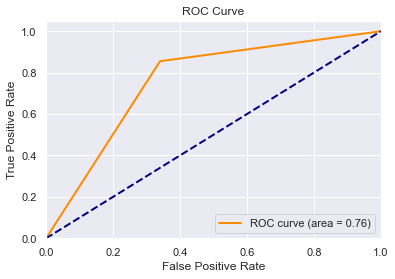

0.7573803105841941


In [26]:
# Since we are using f1 and accuracy as our metrics for goodness, we'll run an ROC curve on 
# the best fitting parameters are a C of 100 and a logistic penalty of l2 and solver is lbfgs

lr_clf = LogisticRegression(penalty="l2", C=100 , solver= 'lbfgs')
for train_index, test_index in cv_object.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    for train_indices, test_indices in cv_object.split(X,y):
        X_train = X[train_indices]
        y_train = y[train_indices]
    
        X_test = X[test_indices]
        y_test = y[test_indices]
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test , y_hat))

In [27]:
X_test.shape

(8232, 5)

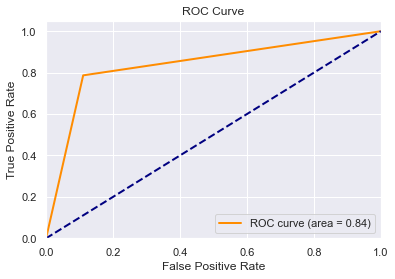

0.8380191312230147


In [28]:
# Since we are using f1 and accuracy as our metrics for goodness, we'll run an ROC curve on 
# the best fitting parameters are a estimators of 100 and a max features of 5.
clf = RandomForestClassifier(n_estimators=100, max_features=5, n_jobs=-1)
for train_index, test_index in cv_object.split(X, y):
    for train_indices, test_indices in cv_object.split(X,y):
        X_train = X[train_indices]
        y_train = y[train_indices]
    
        X_test = X[test_indices]
        y_test = y[test_indices]
    # train the classifier on the training data
    clf.fit(X_train, y_train)  # train object
    y_hat = clf.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print(roc_auc_score(y_test , y_hat))

In [29]:
X_test.shape

(8232, 5)

[0.6014282  0.20759414 0.06849366 0.08694052 0.03554347]


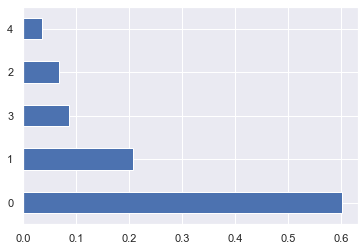

In [30]:
# Show the feature importance of the components. 
clf = RandomForestClassifier(n_estimators=100, max_features=5, n_jobs=-1)
for train_index, test_index in cv_object.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    
    # train the classifier on the training data
    clf.fit(X_train, y_train)  # train object
    y_hat = clf.predict(X_test)
print(clf.feature_importances_)
feat =pd.Series(clf.feature_importances_)
feat.nlargest(10).plot(kind="barh")
#plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
#plt.show()

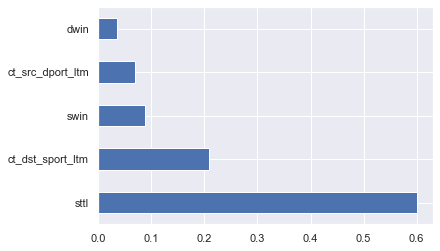

In [31]:
feat_importances = pd.Series(clf.feature_importances_, index=df_five.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [33]:
print(y_hat , X_test)

[1 1 1 ... 1 0 1] [[254   1   1   0   0]
 [254   1   1   0   0]
 [254   1   1   0   0]
 ...
 [254   1   1 255 255]
 [254   1   2 255 255]
 [254   1   1   0   0]]


In [105]:
#del pred['pred']
#y_pred['label']=pd.DataFrame(y_hat)
pred['prediction_label']=pd.DataFrame(y_hat)

#y_test['preds'] = y_pred
#test = pd.DataFrame({'X_test':X_test,index=[1]})
df_out = pd.merge(df_five,pred,how = 'left',left_index = True, right_index = True)


df_out.head()
df_out.to_csv('Attack_prediction.csv')
#df_out.to_csv('Prediction_file.csv')
df_out.head()

,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,swin,dwin,prediction_label
0,254,1,1,0,0,1.0
1,254,1,1,0,0,1.0
2,254,1,1,0,0,1.0
3,254,1,2,0,0,1.0
4,254,1,2,0,0,0.0


In [108]:
#import Counter
df_out.count()
df_out.prediction_label.unique()

array([ 1.,  0., nan])

In [75]:
rand_clf = clf
rand_clf

RandomForestClassifier(max_features=5, n_jobs=-1)

In [76]:
X_test.shape

(8232, 5)

In [77]:
import pickle
pickle.dump(rand_clf, open('Attack_traffic_model.pkl','wb'))

In [78]:
new_model = pickle.load(open('Attack_traffic_model.pkl','rb'))

In [ ]:
new_model

In [ ]:
X_test.shape